# Ejemplo práctico Apriori

## 1. Importar librerias

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from apyori import apriori

%matplotlib notebook

## 2. Cargar archivo

https://www.kaggle.com/mathchi/online-retail-data-set-from-ml-repository


In [6]:
df = pd.read_csv("retail_dataset.csv")
df.head()

0       1     2       3       4       5       6
0   Bread    Wine  Eggs    Meat  Cheese  Pencil  Diaper
1   Bread  Cheese  Meat  Diaper    Wine    Milk  Pencil
2  Cheese    Meat  Eggs    Milk    Wine     NaN     NaN
3  Cheese    Meat  Eggs    Milk    Wine     NaN     NaN
4    Meat  Pencil  Wine     NaN     NaN     NaN     NaN

## 3. Preprocesamiento

In [8]:
items = (df["0"].unique()) # Primera fila
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [9]:
df.describe()

0     1     2     3     4       5      6
count     315   285   245   187   133      71     41
unique      9     9     9     9     9       9      9
top     Bread  Meat  Eggs  Milk  Wine  Pencil  Bread
freq       74    47    52    45    36      13     11

### Pasamos los datos a una lista

In [17]:
# transacciones = []
# for i in range(0, df.shape[0]):
#      transacciones.append([str(df.values[i,j]) for j in range(0, df.shape[1])])
# transacciones

n = df.shape[0]
transacciones = []

for i in range(0,n): # recorrer filas y columnas i filas y j columna
    transaccion = []
    m = df.shape[1]
    for j in range(0, m):
        itm = str(df.values[i,j])
        if itm != "nan":
            transaccion.append(itm)
        transacciones.append(transaccion)

transacciones

[['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Cheese', 'Meat', 'Eggs', 'Mi

## 4. Reglas de asociación: Apriori

In [19]:
# min_support= minimo del soporte
# min_confidence= minimo de la confianza
# min_lift= minimo del lift
# min_length= minimo de items que deben estar presente

asociar_regla = apriori(transacciones, min_support=0.2, min_confidence=0.5, min_lift=1.1, min_length=3)
reglas_asociada = list(asociar_regla)
print('Número de reglas de asociación : ',len(reglas_asociada))

Número de reglas de asociación :  17


In [20]:
# Pasar reglas a una lista
# y se visualiza cuanta reglas de apriori se encontros
# basado con las restricciones de min**
# ademas se pasa los datos a un dataframes para visualizar los datos
ar = pd.DataFrame(reglas_asociada)
ar_in = pd.DataFrame([reglas_asociada[i][2][0] for i in range(len(reglas_asociada))])
rules = pd.concat([ar, ar_in], axis=1, sort=False)[['items','support','items_base','items_add',
                                                     'confidence','lift']]
rules.columns = ['items','support','antescedente','consecuente','confidence','lift']
rules = rules[['items','antescedente','consecuente','support','confidence','lift']]
rules = rules.sort_values(by=['support'], inplace=False, ascending=False)
rules.head()


items antescedente consecuente   support  confidence      lift
5  (Cheese, Meat)     (Cheese)      (Meat)  0.323810    0.645570  1.355696
6  (Cheese, Milk)     (Cheese)      (Milk)  0.304762    0.607595  1.211344
4  (Cheese, Eggs)     (Cheese)      (Eggs)  0.298413    0.594937  1.358008
0  (Bread, Bagel)      (Bagel)     (Bread)  0.279365    0.656716  1.301042
2   (Milk, Bread)      (Bread)      (Milk)  0.279365    0.553459  1.103415

## 5. Graficar 

<IPython.core.display.Javascript object>


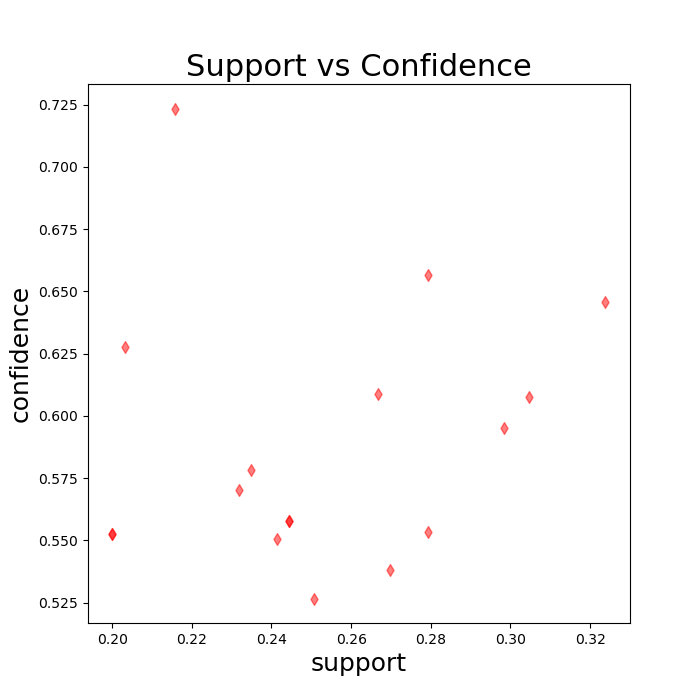

Text(0.5, 1.0, 'Support vs Confidence')

In [21]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(rules['support'], rules['confidence'], color='red',marker='d',alpha=0.5)
ax.set_xlabel('support',fontsize=18)
ax.set_ylabel('confidence',fontsize=18)
ax.set_title('Support vs Confidence',fontsize=22)


<IPython.core.display.Javascript object>


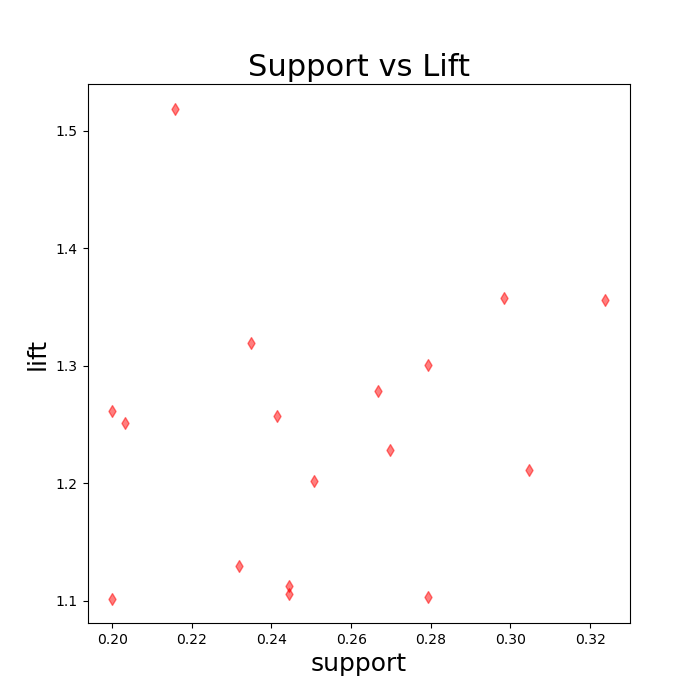

Text(0.5, 1.0, 'Support vs Lift')

In [22]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(rules['support'], rules['lift'], color='red',marker='d', alpha=0.5)
ax.set_xlabel('support',fontsize=18)
ax.set_ylabel('lift',fontsize=18)
ax.set_title('Support vs Lift',fontsize=22)

<IPython.core.display.Javascript object>


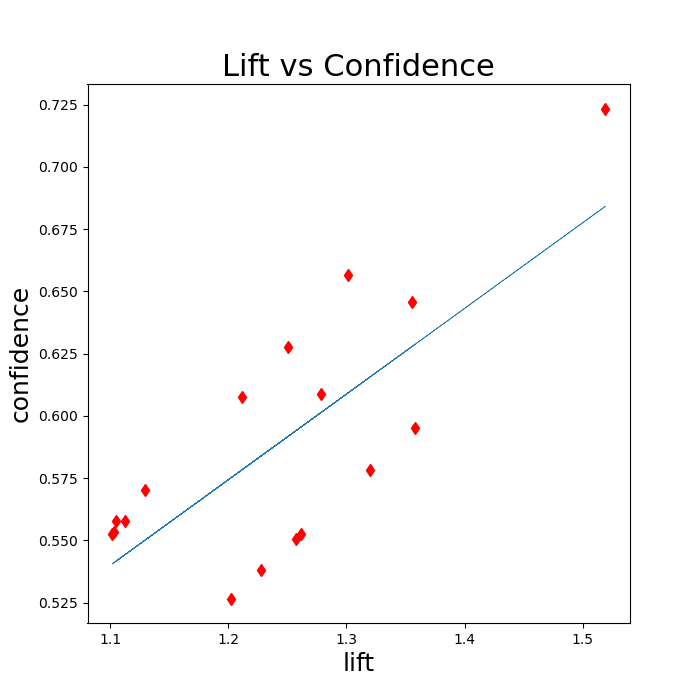

Text(0.5, 1.0, 'Lift vs Confidence')

In [23]:
fig, ax = plt.subplots(figsize=(7,7))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
ax.plot(rules['lift'], rules['confidence'],'rd',rules['lift'], fit_fn(rules['lift']),linewidth=0.5)
ax.set_xlabel('lift',fontsize=18)
ax.set_ylabel('confidence',fontsize=18)
ax.set_title('Lift vs Confidence',fontsize=22)


## Help

In [24]:
help(apriori)


Help on function apriori in module apyori:

apriori(transactions, **kwargs)
    Executes Apriori algorithm and returns a RelationRecord generator.
    
    Arguments:
        transactions -- A transaction iterable object
                        (eg. [['A', 'B'], ['B', 'C']]).
    
    Keyword arguments:
        min_support -- The minimum support of relations (float).
        min_confidence -- The minimum confidence of relations (float).
        min_lift -- The minimum lift of relations (float).
        max_length -- The maximum length of the relation (integer).

